In [36]:
import os 
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt 
import astroalign
import scipy.signal as sig
import scipy.optimize as opt

### Calibration of KAST spectrum

1. We use the spectrum from `arcs.fits` which is a blue spectrum taken from a set of lamps and match peaks from the spectrum on the KAST webpage ([https://mthamilton.ucolick.org/techdocs/instruments/kast/kast_arcSpectra.html][https://mthamilton.ucolick.org/techdocs/instruments/kast/kast_arcSpectra.html]). We flatten the spectrum by slicing it along the x-axis
2. We find the wavelengths of the peaks from the corresponding red or blue spectrum on KAST webpage and plot the `peak wavelength` vs `x-pixel`.
3. Lastly, we fit a polynomial curve to the data. This function enables us to convert between pixel position and wavelength on the spectra we take. 

In [5]:
_cache_dir = os.getcwd()

In [11]:
arc_hdu = fits.open(os.path.join(_cache_dir, 'arcs.fits'))[0]
solar_hdu = fits.open(os.path.join(_cache_dir,"solar_spectrum.fits"))[0]

In [15]:
arc_hdu.header

SIMPLE  =                    T / NORMAL FITS IMAGE                              
BITPIX  =                   16 / DATA PRECISION                                 
NAXIS   =                    2 / NUMBER OF IMAGE DIMENSIONS                     
NAXIS1  =                 2112 / NUMBER OF COLUMNS                              
NAXIS2  =                  325 / NUMBER OF ROWS                                 
CRVAL1U =                    0 / COLUMN ORIGIN                                  
CRVAL2U =                 1249 / ROW ORIGIN                                     
CDELT1U =                    1 / COLUMN CHANGE PER PIXEL                        
CDELT2U =                   -1 / ROW CHANGE PER PIXEL                           
OBSNUM  =                 1014 / OBSERVATION NUMBER                             
IDNUM   =                    3 / IMAGE ID                                       
UGEOM   =                    6 / UCAM READOUT GEOMETRY                          
DGEOM   =                   

We use the cell below to search for the x-pixel positions of peaks in our arcs spectrum

In [58]:
sig.find_peaks(arc_hdu.data[200,:],height=(2000,4000))

(array([  80,  245,  317,  514,  532,  831,  848,  898,  911,  914,  923,
         925,  940,  942,  946,  950,  954,  960,  963,  972,  974,  983,
         993, 1223, 1227, 1231, 1234, 1534, 1582, 1778], dtype=int64),
 {'peak_heights': array([2439., 2431., 3274., 2002., 3297., 2015., 2049., 2007., 2164.,
         2010., 2037., 2045., 2123., 2051., 2001., 2007., 2003., 2050.,
         3756., 2026., 2004., 2005., 2014., 2178., 2000., 2567., 2095.,
         2019., 2125., 2662.])})

We manually input the corresponding peak values from the KAST spectrum on the webpage (link provided above) and x-pixel positions from the arc spectrum below,

In [60]:
res = np.array([[1241, 4358.33], [1930, 5460.74], [1664, 5085.82], [931, 4046.56], [518,3650.15], [477,3610.15], [245,3403.65], [317,3466.55]])

Below is the polynomial fit code for our values above,

In [61]:
def quad(x,a,b,c):
    return a*x**2 + b*x + c

res2 = opt.curve_fit(quad, res[:,0], res[:,1])

In [63]:
x_lst = np.linspace(0,2000)
y_lst = [quad(x, res2[0][0], res2[0][1], res2[0][2]) for x in x_lst]

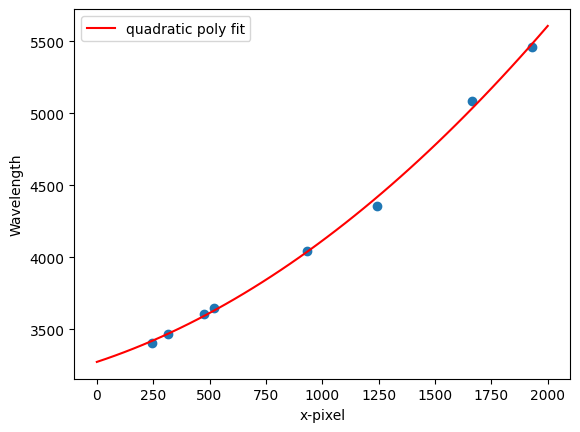

In [66]:
plt.scatter(res[:,0], res[:,1])
plt.plot(x_lst, y_lst, c='red', label=f'quadratic poly fit')
plt.xlabel("x-pixel")
plt.ylabel("Wavelength")
plt.legend()

Below, is the arcs spectrum flattened

Text(0, 0.5, 'x-pixel')

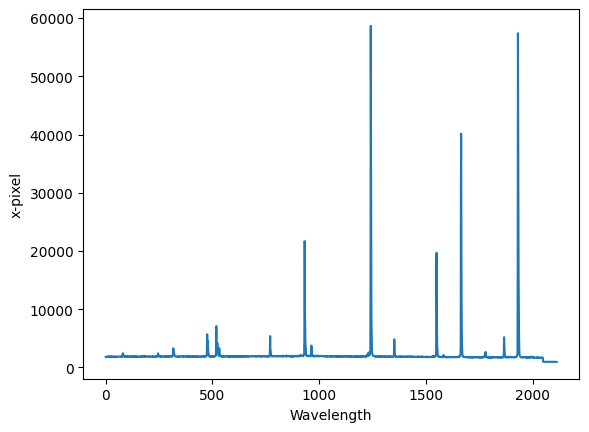

In [67]:
plt.plot(arc_hdu.data[200,:])
plt.xlabel("Wavelength")
plt.ylabel("x-pixel")